In [1]:
# Example 13.1 Short corridor with switched actions
def move(action, state):
    # terminal
    if state in (0, 4):
        return state

    # switch left and right at state 2
    if state == 2:
        return state + (action * 2 - 1)
    
    # default
    return state - (action * 2 - 1)

def get_reward(action, state):
    # terminal
    if state in (0, 4):
        return 0
    # non-terminal
    else:
        return -1

In [2]:
# Agent definitions
import numpy as np
from scipy.special import expit

def get_probability(policy):
    return expit(policy[0] - policy[1])

def sample_action(policy):
    probability = get_probability(policy)
    return np.random.choice(2, p=[probability, 1 - probability])

def get_gradient(policy, action):
    probability = get_probability(policy)
    return (probability + action - 1) * np.array([-1, 1])

In [3]:
# Policy gradient methods
def generate_episode(policy, steps):
    state = 2
    rewards = []
    actions = []
    for step in range(steps):
        action = sample_action(policy)
        reward = get_reward(action, state)
        state = move(action, state)

        actions.append(action)
        rewards.append(reward)
    return actions, rewards

def update_policy(policy, actions, rewards, steps, learning_rate):
    for step in range(steps):
        total_reward = sum(rewards[step:])
        gradient = get_gradient(policy, actions[step])
        policy += learning_rate * total_reward * gradient
    return policy

In [4]:
# run experiments
experiments = 1000
episodes = 1000
steps = 10
learning_rate = 0.01
results = []

for experiment in range(experiments):
    policy = (np.random.rand(2) - 0.5) * 20
    result = []
    for episode in range(episodes):
        actions, rewards = generate_episode(policy, steps)
        result.append(sum(rewards))
        policy = update_policy(policy, actions, rewards, steps, learning_rate)
    results.append(result)

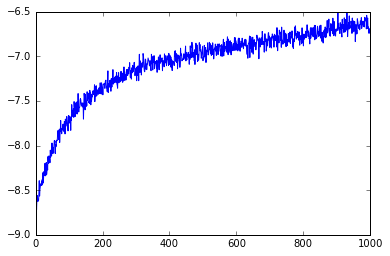

In [5]:
# plot average rewards per episodes
%matplotlib inline
import matplotlib.pyplot as plt

average_rewards = np.average(np.array(results), 0)
plt.plot(average_rewards)
plt.show()